In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
data = sns.load_dataset("tips")
data.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


C:\Users\R c\AppData\Local\Temp\ipykernel_10812\1963681608.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["tip"])


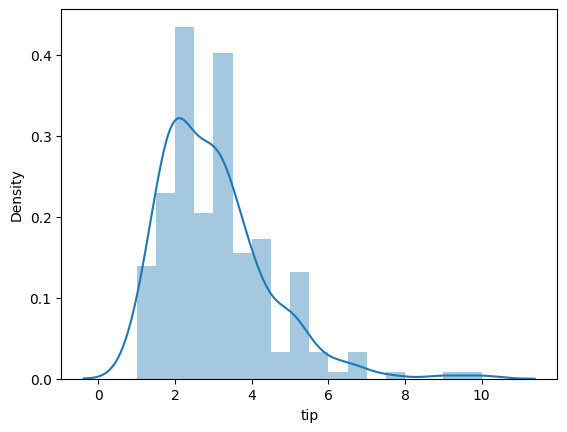

In [2]:
sns.distplot(data["tip"])
plt.show()

In [3]:
 # ye ak non distribution data ha jiski tail boht lamb9i ha ab hm isko normal ma convert krain ga sbsa pahla hm outier 
# remove krain ga iqr method ka through (check outlier5.ipynb file for this)
q1 = data["tip"].quantile(0.25)
q3 = data["tip"].quantile(0.75)
IQR = q3 - q1 # check above file for this

In [4]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR) 
min_range,max_range # neg wali neg check above file 

(np.float64(-0.34375), np.float64(5.90625))

In [5]:
data = data[data["tip"]<= max_range] # check above or hmna isko orignal data sa replace kr diya isko 

C:\Users\R c\AppData\Local\Temp\ipykernel_10812\904746996.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["tip"])


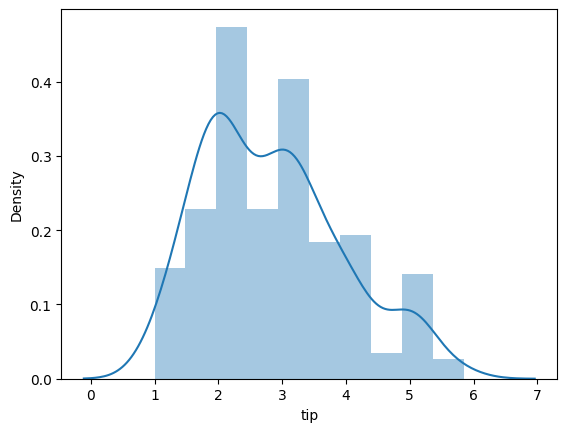

In [6]:
sns.distplot(data["tip"])
plt.show() # kafi had tk ab isma sa ouylier hat chuka ha lakin abhi tk accurate nhi howa 

In [7]:
# ab isko normal distribution ma convert krna ja raha ha 

# Function Tranformation

In [8]:
from sklearn.preprocessing import FunctionTransformer
ft  = FunctionTransformer(func= np.log1p)  # log1p(xmean wo single single kr ka sb value) for ex log1p(0) =ln(1+0)=0
# log1p hmna isliye diya log base10 ku nhi diya log base e ku n diya because iski value 0 b ho sakti ha or log 0 ki value 
# yahn ma work nhi kra g logp1 ma hm data ma sa -1 krain ga to hmara pass ak normal value a jay g ss attach to understand log

In [9]:
ft.fit(data[["tip"]]) # fit already explain first file

FunctionTransformer(func=<ufunc 'log1p'>)

In [10]:
data["tip_ft"] = ft.transform(data[["tip"]]) # from file 1
data.head(3) # column is created 

,total_bill,tip,sex,smoker,day,time,size,tip_ft
0,16.99,1.01,Female,No,Sun,Dinner,2,0.698135
1,10.34,1.66,Male,No,Sun,Dinner,3,0.978326
2,21.01,3.50,Male,No,Sun,Dinner,3,1.504077


C:\Users\R c\AppData\Local\Temp\ipykernel_10812\2937903205.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["tip"])
C:\Users\R c\AppData\Local\Temp\ipykernel_10812\2937903205.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["tip_ft"])


<function matplotlib.pyplot.show(close=None, block=None)>

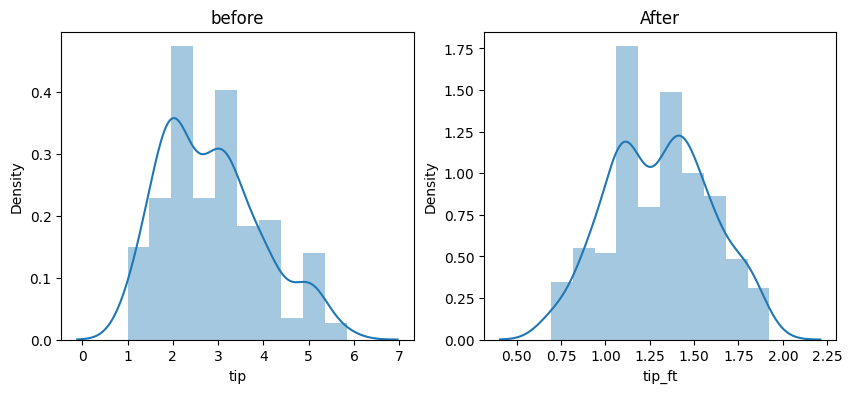

In [11]:
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.title("before")
sns.distplot(data["tip"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(data["tip_ft"])
plt.show


In [12]:
from sklearn.preprocessing import FunctionTransformer
ft  = FunctionTransformer(func= lambda x  : x**2)  # log1p(xmean wo single single kr ka sb value) for ex log1p(0) =ln(1+0)=0
ft.fit(data[["fare"]]) # fit already explain first file

KeyError: "None of [Index(['fare'], dtype='object')] are in the [columns]"

In [ ]:
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.title("before")
sns.distplot(data["tip"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(data["tip_ft"])
plt.show


In [ ]:
# is tariqa sa b ho sakta lakin hmari output thiq nhi a ray ye dakhain isna change krna sa data ma kitne o=positive change lai ha 